In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN

In [2]:
# Load the CSV file
file_path = 'testing_zone_predictions.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the data to understand its structure
data.head()


,Unnamed: 0,lon,lat,z,class,cluster
0,871,-1.968586,-0.332922,-0.332987,0,-1
1,939,-1.968586,-0.313141,-3.241326,0,-1
2,957,-1.968586,-0.307905,2.879204,0,-1
3,970,-1.968586,-0.304124,-11.378592,0,-1
4,971,-1.968586,-0.303833,-7.423770,0,-1


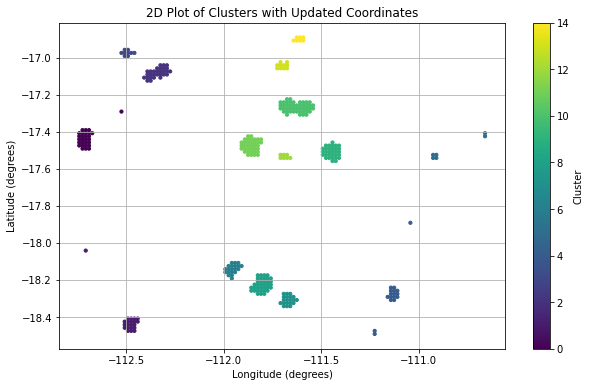

In [15]:
# Filter the data to include only clusters greater than -1
filtered_data = data[data['cluster'] > -1]

# Create a copy of the filtered data to avoid the SettingWithCopyWarning
filtered_data = filtered_data.copy()

# Update the longitude and latitude to be in degrees
filtered_data['lon'] = filtered_data['lon'] * 180 / np.pi
filtered_data['lat'] = filtered_data['lat'] * 180 / np.pi

# Create the updated plot
plt.figure(figsize=(10, 6))
plt.scatter(filtered_data['lon'], filtered_data['lat'], c=filtered_data['cluster'], cmap='viridis', s=10)

# Add titles and labels
plt.title('2D Plot of Clusters with Updated Coordinates')
plt.xlabel('Longitude (degrees)')
plt.ylabel('Latitude (degrees)')

# Show color bar
plt.colorbar(label='Cluster')
plt.grid('on')
# Display the plot
plt.show()


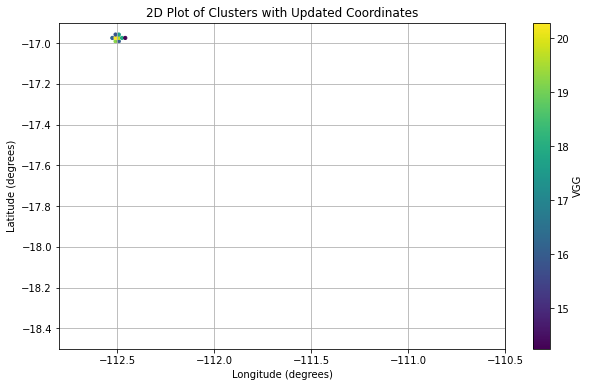

In [67]:
# filtered_data = data[data['cluster'] == 10]
# filtered_data = data[data['cluster'] == 2]
filtered_data = data[data['cluster'] == 3]

# Create a copy of the filtered data to avoid the SettingWithCopyWarning
filtered_data = filtered_data.copy()

# Update the longitude and latitude to be in degrees
filtered_data['lon'] = filtered_data['lon'] * 180 / np.pi
filtered_data['lat'] = filtered_data['lat'] * 180 / np.pi

# Create the updated plot
plt.figure(figsize=(10, 6))
plt.scatter(filtered_data['lon'], filtered_data['lat'], c=filtered_data['z'], cmap='viridis', s=10)

# Add titles and labels
plt.title('2D Plot of Clusters with Updated Coordinates')
plt.xlabel('Longitude (degrees)')
plt.ylabel('Latitude (degrees)')
plt.xlim([-112.8, -110.5])
plt.ylim([-18.5, -16.9])
# Show color bar
plt.colorbar(label='VGG')
plt.grid('on')
# Display the plot
plt.show()


<ipython-input-68-8fe28d86f205>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_vgg['peak_label'] = db.labels_


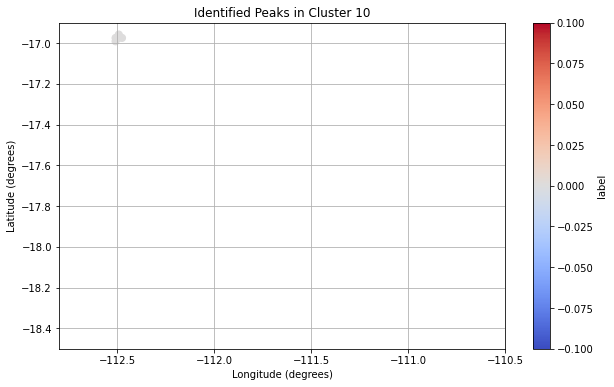

In [68]:
# Normalize the VGG values
filtered_data2 = filtered_data.copy()
filtered_data2['normalized_vgg'] = (filtered_data2['z'] - filtered_data2['z'].min()) / (filtered_data2['z'].max() - filtered_data2['z'].min())

# Identify regions with high VGG values (e.g., greater than 0.5)
high_vgg = filtered_data2[filtered_data2['normalized_vgg'] > 0.5]

# Apply DBSCAN to find clusters within the high VGG regions
db = DBSCAN(eps=0.02, min_samples=2).fit(high_vgg[['lon', 'lat']])
high_vgg['peak_label'] = db.labels_

# Plot the VGG values with the identified peaks
plt.figure(figsize=(10, 6))
plt.scatter(high_vgg['lon'], high_vgg['lat'], c=high_vgg['peak_label'], cmap='coolwarm', s=50, label='Identified Peaks')

# Add titles and labels
plt.title('Identified Peaks in Cluster 10')
plt.xlabel('Longitude (degrees)')
plt.ylabel('Latitude (degrees)')
plt.xlim([-112.8, -110.5])
plt.ylim([-18.5, -16.9])

# Show color bar
plt.colorbar(label='label')
plt.grid(True)

# Display the plot
plt.show()
